In [1]:
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt
from easy_lmfit import *

%matplotlib inline

# Introduction to the easy_lmfit module and lm_curve_fit function

Below is a new fitting routine that is not based on the scipy curve_fit functionality. This partricular fitting function is based instead on the lmfit library. This library has several advantages over curve_fit while maintaining the core functionality. Unlike curve_fit, lmfit allows for almost unlimited control over fitting parameters from controlling whether parameters can vary to constraining variables to mathematic expressions. The lm_curve_fit function below is the function wrapper for the lmfit core functionality. This core functionality functions in a manner similar to curve_fit, with the exception that initial guesses (p0), parameter override (p_over), and parameter domain (param_domain) are classes objects. The keys in the p0 dict object must be the same as the naming use in the function to be fit, but unlike if lists are used, the order of the parameters in p0 don't matter. The use of dicts instead of lists make entering information and selecting what parameters to vary more natural. 

The other feature besides parameter override is the ability to create constraining equations. This is done in a similar manner to how p_over is defined, with the ability to selectively choose which parameters need to be constrained. 

As a replacement for curve_fit, lm_curve_fit can also take inputs in the same manner as curve_fit. Instead of using a dict object for the parameter guesses, domain, and the override values, and constraining functions, you are able to pass a list that is the length of the function parameters in the order of the parameters as they are passed into the function. This is demonstrated below. One key difference between the use of dict objects vs lists for parameter entry is that the returned fit parameters when using lists will be returned as a list, while the use of a dict will return dict objects with keys associated with the funcion parameters. One can convert the dict output to a list by using a key loop to append values back to a list.

The downside to lmfit over curve_fit is that lmfit is not part of the anaconda distribution (as of dec 2018). It is however easy to download using pip or conda forge. 

To begin you will need to install lmfit's core library, and also run the setup.py file in the main LMFit file path. To do this simply: 

________________________________________________________________
Open a cmd window in the path where the setup.py is located and run: 

>>python setup.py install

Then import easy_lmfit

~AEO

Actual parameters: 5, 1.5, 1.0
----------------------------------------------------------
Scipy.optimize.curve_fit parameters are: 4.936942096669229, 1.5076572432686013, 0.9836045365356718
Scipy.optimize.curve_fit parameter error: 0.04555636616433446, 0.01048047324879887, 0.010480473330283659
----------------------------------------------------------
lm_curve_fit parameters are: 4.936942096669229, 1.5076572432686013, 0.9836045365356718
lm_curve_fit parameter error: 0.04555636616433446, 0.01048047324879887, 0.010480473330283659
----------------------------------------------------------


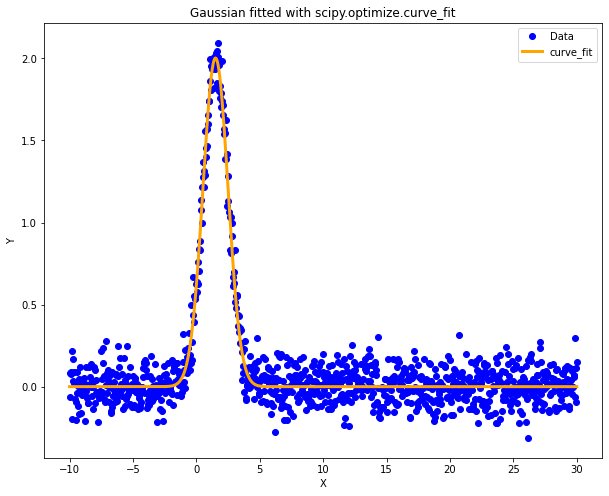

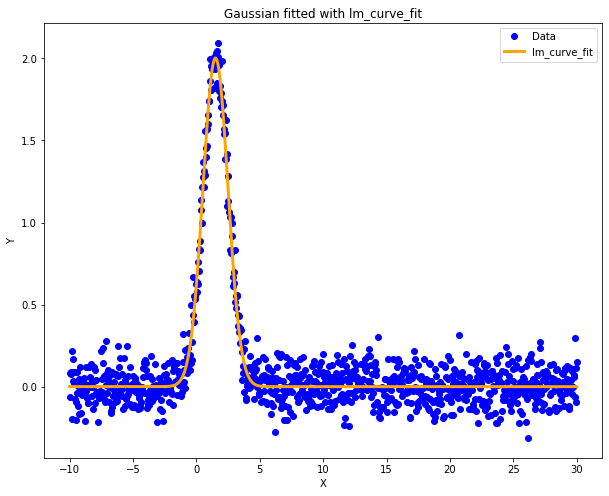

In [2]:
'''
lm_curve_fit compared to scipy.optimize.curve_fit:

The below example is a simple demonstration of the two functions in fitting the same data using the same input. We will
begin by defining a function for a gaussian. lm_curve_fit and curve_fit are both wrappers for the same least_sq optimization
routine, and will return the same answers. The lm_curve_fit wrapper was written to be used, to first order, in an identical 
manner to curve_fit.

'''

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

#experimental functiom
def experimental_function(x_data):
    p=[5, 1.5, 1.0]
    lp=[.2, -.05]
    sig=.1
    mu=0
    return gaussian(x_data, *p)+sig*np.random.randn(len(x_data))+mu

x_data=np.linspace(-10,30,1000)
y_data=experimental_function(x_data)

#define an initial guess
p0=[2,2,2]

#using curve_fit
params, perr=scipy.optimize.curve_fit(gaussian, x_data, y_data, p0)

plt.figure(figsize=(10,8))
plt.plot(x_data, y_data, 'ob', label='Data')
plt.plot(x_data, gaussian(x_data, *params), color='orange', linewidth=3, label='curve_fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gaussian fitted with scipy.optimize.curve_fit')


#using lm_curve_fit
params_lm, perr_lm=lm_curve_fit(gaussian, x_data, y_data, p0)

plt.figure(figsize=(10,8))
plt.plot(x_data, y_data, 'ob', label='Data')
plt.plot(x_data, gaussian(x_data, *params_lm), color='orange',linewidth=3, label='lm_curve_fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gaussian fitted with lm_curve_fit')
print('Actual parameters: %s'%', '.join(map(str, [5, 1.5,1.0])))
print('----------------------------------------------------------')
print('Scipy.optimize.curve_fit parameters are: %s'%', '.join(map(str, params)))
print('Scipy.optimize.curve_fit parameter error: %s'%', '.join(map(str, np.sqrt(np.diag(perr)))))
print('----------------------------------------------------------')
print('lm_curve_fit parameters are: %s'%', '.join(map(str, params_lm)))
print('lm_curve_fit parameter error: %s'%', '.join(map(str, perr_lm)))
print('----------------------------------------------------------')

In [13]:
'''
How to check available models in the lmfit library simply run:

get_lm_models()

This will print a complete list of available models that you can use, as well as a link to find more about the 
model's and their functional forms.

'''

get_lm_models()

Available lmfit model functions:
----------------------------------
BreitWignerModel
ComplexConstantModel
ConstantModel
DampedHarmonicOscillatorModel
DampedOscillatorModel
DimensionalError
DonaichModel
DoniachModel
ExponentialGaussianModel
ExponentialModel
ExpressionModel
GaussianModel
Interpreter
LinearModel
LognormalModel
LorentzianModel
Model
MoffatModel
ParabolicModel
Pearson7Model
PolynomialModel
PowerLawModel
PseudoVoigtModel
QuadraticModel
RectangleModel
SkewedGaussianModel
SkewedVoigtModel
SplitLorentzianModel
StepModel
StudentsTModel
ThermalDistributionModel
VoigtModel
----------------------------------
To create an empty parameter dict or learn about the variables of the different models use lmf.get_model_params(fcn)
For more information on the above functional forms go to: https://lmfit.github.io/lmfit-py/builtin_models.html


In [14]:
'''
Determining model variables and generating a dict object for fitting:

While lm_curve_fit can be used just like the np.curve_fit function with the use of a list for parameter guesses and domain,
LMFit can also use dict opjects instead. This has the advantage of clarity but does require the dict objects have the
correct names corresponding to the function variable. Because of this, the lmf library has a utlility that determines the 
fit parameter names, ordering, and generates a generic dict object for p0 for that function. To demonstrate we will 
how how it can be used with user defined, built-in, and composite models. 

Here Model and GaussianModel are built-in lmfit core library functions that we are calling directly. This is because
all of the built in models are inhereted by easy_lmfit for convenience 
'''

#user defined function
print('------------------------')
print('User defined function')
print('------------------------')

def user_function1(x, a, b, c):
    return x*(a+b+c)

get_model_params(user_function1)

print('------------------------')
print('Built-in model')
print('------------------------')

#built-in models, GaussianModel

get_model_params(GaussianModel)

print('------------------------')
print('Composite model')
print('------------------------')

#composite model

def user_function2(x, n, m, l):
    return x*(n+m+l)

mod=Model(user_function1)+Model(user_function2)

print('Model is: %s'%str(mod).split(': ')[1].rsplit('>')[0])

get_model_params(mod)

------------------------
User defined function
------------------------
Model is: user_function1
Independent Variable: x
Parameter # 1: a
Parameter # 2: b
Parameter # 3: c
p0 Param dictionary
p0={'a': None, 'b': None, 'c': None}
------------------------
Built-in model
------------------------
Model is: GaussianModel
Independent Variable: x
Parameter # 1: amplitude
Parameter # 2: center
Parameter # 3: sigma
p0 Param dictionary
p0={'amplitude': None, 'center': None, 'sigma': None}
------------------------
Composite model
------------------------
Model is: (Model(user_function1) + Model(user_function2))
Model is: (Model(user_function1) + Model(user_function2))
Independent Variable: x
Parameter # 1: a
Parameter # 2: b
Parameter # 3: c
Parameter # 4: n
Parameter # 5: m
Parameter # 6: l
p0 param dictionary
p0={'a': None, 'b': None, 'c': None, 'n': None, 'm': None, 'l': None}


lmfit.models lmfit.models
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 119
    # variables        = 2
    chi-square         = 7.66028708
    reduced chi-square = 0.06547254
    Akaike info crit   = -322.425810
    Bayesian info crit = -316.867563
[[Variables]]
    amplitude:  2.75682408 +/- 0.14489113 (5.26%) (init = 1)
    center:     1.43033889 +/- 0.08919650 (6.24%) (init = 1)
    sigma:      1.2 (fixed)


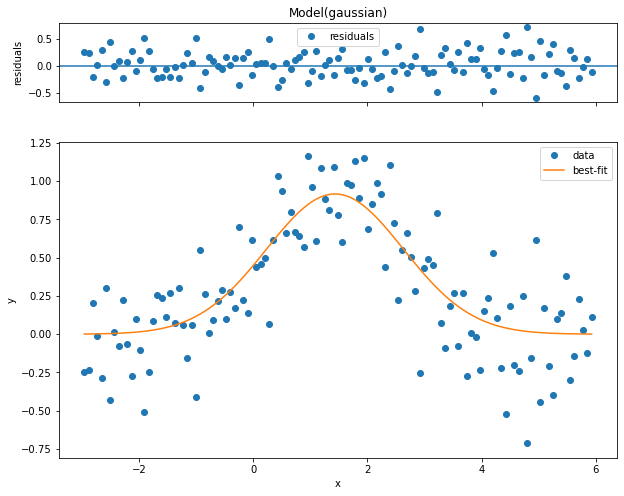

In [5]:
'''
Fitting a Gaussian:

This demo shows how one can use the lm_fit library's built in model class to fit a gaussian line shape. 
Here we use a dict to describe the initial guess parameters, p0, the domain of a single fit parameter,
and an override of a parameter. We will use the p0 dict for the gaussian model from above. Here we also 
demonstrate the following keywords:

verbose: This displays the full result output with fit statistics, best fit values (or fixed values), and parameter errors.

plot_fit: like dsfit and kfit, easy_lmfit has a built in plot that displays residuals, data, and fit, for at-a-glance 
          fitting.
          
          
'''


#create general gaussian with 'unknown' parameters and noise for creating data
def experimental_function(x):
    p=[1.2, 1.5, 3.0]
    g=p[2]/(p[0]*np.sqrt(2*np.pi)) * np.exp(-1. / 2. * (x - p[1]) ** 2 / p[0] ** 2)
    sig=.25
    mu=0
    return g+sig*np.random.randn(len(x))+mu

#create our artificial experimental data
x_data=np.linspace(-5, 10, 200)
y_data=experimental_function(x_data)


#initiate 
p0={'sigma': 1, 'center': 1, 'amplitude': 1}
p_over={'sigma': 1.2}
param_domain={'center':[0,2]}
fit_domain=[-3,6]

params, err=lm_curve_fit(GaussianModel, x_data, y_data, p0=p0, p_over=p_over, param_domain=param_domain, fit_domain=fit_domain, verbose=True, plot_fit=True)
fit_params=[]

#how to convert fit parameters from dict to list object
for keys in iter(params.keys()):
    fit_params.append(params[keys])


[[Model]]
    (Model(gaussian) + Model(line))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 1000
    # variables        = 5
    chi-square         = 66.5093838
    reduced chi-square = 0.06684360
    Akaike info crit   = -2700.41223
    Bayesian info crit = -2675.87346
[[Variables]]
    amp:        5.01604531 +/- 0.09254937 (1.85%) (init = 3)
    cen:        1.50815796 +/- 0.01713827 (1.14%) (init = 1)
    wid:        1.00377744 +/- 0.01852390 (1.85%) (init = 1)
    slope:      0.19829204 +/- 0.00193963 (0.98%) (init = 1)
    intercept: -0.05746253 +/- 0.01177452 (20.49%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid)         =  0.667
    C(amp, intercept)   = -0.594
    C(slope, intercept) = -0.502
    C(wid, intercept)   = -0.396
    C(amp, slope)       =  0.172
    C(cen, slope)       = -0.162
    C(wid, slope)       =  0.115


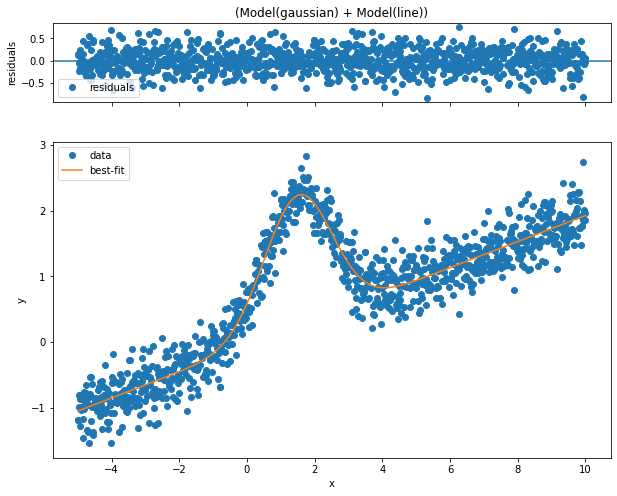

In [6]:
'''
Composite Model Fitting with User Defined Models:

Here we demonstrate how a user can define separate models and chain them together to get a composite fit function. This is
done by creating a custom model class using user defined functions. Here we demonstrate how to create the composite model, 
and fitting it to artificial data with gaussian noise overlaid.

'''



def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

def line(x, slope, intercept):
    """a line"""
    return slope*x + intercept

def experimental_function(x_data):
    p=[5, 1.5, 1.0]
    lp=[.2, -.05]
    sig=.25
    mu=0
    return gaussian(x_data, *p)+line(x_data, *lp)+sig*np.random.randn(len(x_data))+mu

#create our artificial experimental data
x_data=np.linspace(-5, 10, 1000)
y_data=experimental_function(x_data)

#create composite model by calling the Model function from lmfit
mod = Model(gaussian)+Model(line)

#define initial guesses
p0={'amp': 3, 'cen': 1, 'wid': 1, 'slope': 1, 'intercept': 1}

#fit data and show output
params, err=lm_curve_fit(mod, x_data, y_data, p0=p0, plot_fit=True, verbose=True)


------------------------
The actual width is: 18.678
------------------------
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 1000
    # variables        = 1
    chi-square         = 64.7810947
    reduced chi-square = 0.06484594
    Akaike info crit   = -2734.74147
    Bayesian info crit = -2729.83371
[[Variables]]
    amp:  112.315220 +/- 4.1278e-04 (0.00%) == '3 * cen+ 2 / wid'
    cen:  37.4027587 +/- 0.14436851 (0.39%) == '2*max(wid, 10)'
    wid:  18.7013793 +/- 0.07218426 (0.39%) (init = 5)


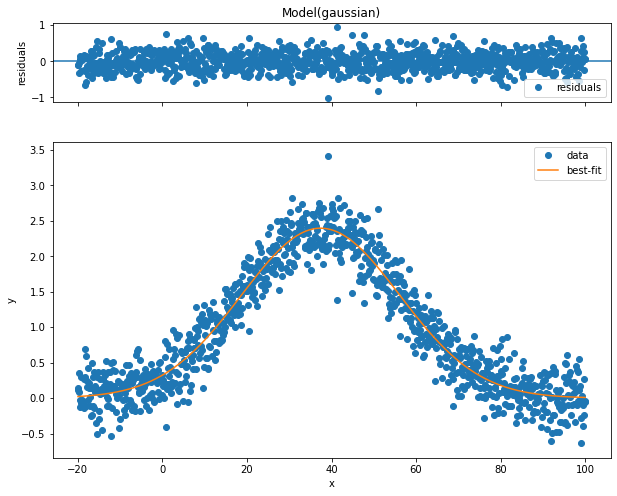

In [7]:
'''
Constraining equations:

In some cases it makes more sense  to constrain an answer to a set of expressions if you know a-priori the 
functional form of the constraints. When doing this you only need to make initial guesses for the independant parameters. 
The below example is a gaussian where the following constraints are set:

1</=sig</=20
mu=2*max(sig, 10)
amp=3.*mu+2./sig

For sigma we can simply give an initial value and a domain since it is independant of the other two, 
while for mu and the amplitude we can type out constraining equations. lm_fit uses the asteval 
module to parse strings to create functions. Asteval supports the following operations:

+, -, *, /, **, &, |, ^, <<, >>, %, and, or,
==, >, >=, <, <=, !=, ~, not, is, is not, in, not in

e(2.71828...) and pi(3.14159...) are also provided as well as the most common mathematical functions:

abs, acos, acosh, asin, asinh, atan, atan2, atanh, ceil,
copysign, cos, cosh, degrees, exp, fabs, factorial,
floor, fmod, frexp, fsum, hypot, isinf, isnan, ldexp,
log, log10, log1p, max, min, modf, pow, radians, sin,
sinh, sqrt, tan, tanh, trunc, real, imag


'''

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

def experimental_function(x_data):
    sigma=np.random.uniform(1,20)
    center=2.*max(sigma, 10)
    amp=3.*center+2./sigma
    p=[amp, center, sigma]
    sig=.25
    mu=0
    print('------------------------')
    print('The actual width is: %.3f'%sigma)
    print('------------------------')
    return gaussian(x_data, *p)+sig*np.random.randn(len(x_data))+mu

#create our artificial experimental data
x_data=np.linspace(-20, 100, 1000)
y_data=experimental_function(x_data)

#define initial guesses
p0={'amp': None, 'cen': None, 'wid':5}

p_domain={'wid':[1,20]}

#define parameter expressions
p_expr={'amp': '3 * cen+ 2 / wid', 'cen': '2*max(wid, 10)'}

#fit data and show output
params, err=lm_curve_fit(gaussian, x_data, y_data, p0=p0, param_domain=p_domain, p_exprs=p_expr, plot_fit=True, verbose=True)


------------------------
The actual width is: 9.358
------------------------
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 1000
    # variables        = 3
    chi-square         = 9.64223310
    reduced chi-square = 0.00967125
    Akaike info crit   = -4635.60255
    Bayesian info crit = -4620.87928
[[Variables]]
    amp:     20.5344394 +/- 0.13988854 (0.68%) == 'delta2-wid'
    cen:     10.4489114 +/- 0.11758796 (1.13%) == 'delta1-wid'
    wid:     9.46556048 +/- 0.11749647 (1.24%) (init = 10)
    delta1:  19.9144719 +/- 0.16629449 (0.84%) (init = 10)
    delta2:  29.9999999 +/- 0.02668709 (0.09%) (init = 15)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, delta2)    = -0.805
    C(wid, delta1)    =  0.707
    C(delta1, delta2) = -0.570


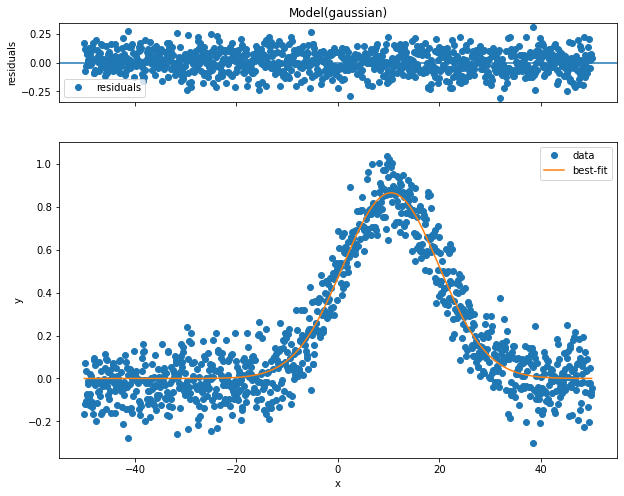

In [8]:
'''
Constraining equations with inequalities:

Above we showed how one can build a constraint equation using inequalities. In our case we have defined our experimental model
such that the width is an independant variable that is 

1</=wid</=20

We have also defined:

center=20-wid
amp=30-wid

If we plug in width we get inequalities that are:

center+wid</=20
amp+wid</=30

To define the above inequalities in the form of constraint expressions we can create dummy variables. 
In our case we define:

center+wid=delta1
amp+wid=delta2

Where:

delta1</=20
delta2</=30

Therefore, rearranging we can write constraint equations:

center=delta1-wid
amp=delta2-wid

Where we define now delta1 and delta2 as separate "dummy" variables by adding them as dict objects. We assign the
inequality by noting the bounds, and choosing an initial value between those bounds. In our case delta1 and delta2
can be between -inf and 20 and 30 respectively. We should then expect the deltas to be equal to 20 and 30 respecively 
in the fit output, which we can check by looking at the full fit statistics.
'''

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

def experimental_function(x_data):
    sigma=np.random.uniform(1,20)
    center=20-sigma
    amp=30-sigma
    p=[amp, center, sigma]
    sig=.1
    mu=0
    print('------------------------')
    print('The actual width is: %.3f'%sigma)
    print('------------------------')
    return gaussian(x_data, *p)+sig*np.random.randn(len(x_data))+mu

#create our artificial experimental data
x_data=np.linspace(-50, 50, 1000)
y_data=experimental_function(x_data)

#define initial guesses
p0={'amp': None, 'cen': None, 'wid':10}

p_domain={'wid':[1,20]}

#define parameter expressions
p_expr={'amp': 'delta2-wid', 'cen': 'delta1-wid','delta1':[10,0,20], 'delta2':[15, 0, 30]}

#fit data and show output
params, err=lm_curve_fit(gaussian, x_data, y_data, p0=p0, param_domain=p_domain, p_exprs=p_expr, plot_fit=True, verbose=True)


------------------------
The actual width is: 17.346
------------------------
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 1000
    # variables        = 2
    chi-square         = 2.57308597
    reduced chi-square = 0.00257824
    Akaike info crit   = -5958.64933
    Bayesian info crit = -5948.83382
[[Variables]]
    amp:     8.01876425 +/- 0.00256398 (0.03%) == '3.*cen+2./wid'
    cen:     2.63453104 +/- 0.05159529 (1.96%) == 'delta1-wid'
    wid:     17.3654611 +/- 0.38659537 (2.23%) (init = 10)
    offset:  1 (fixed)
    delta1:  19.9999921 +/- 0.41896988 (2.09%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, delta1) =  0.995


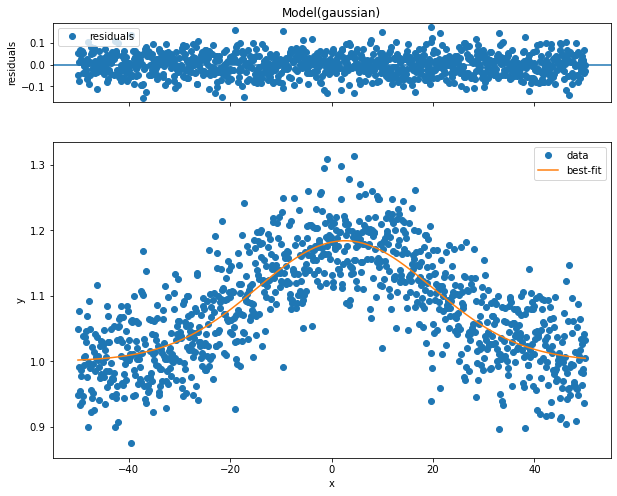

In [9]:
'''
Using lists instead of dict objects for fittings:

As was said in the beginning, the lm_curve_fit function can take inputs as both lists and as dicts. The use
of lists was primarily to make it cross-compatible with code that utilized the scipy curve_fit method,
but the added features of lm_curve_fit can also be utilized using list objects, however there are some differences 
in formatting. For one, the use of a dict object allows you to address parameters directly, which means that the order 
of the inputs is made irrelevant, while with list objects it is important to make sure that the order of the input matches 
the ordering of the original fitting function, since there is nothing pointing to the correct variable. In some
other cases more advanced features such as constraining expressions still require the use of a dict object to work properly.

Below is the above example recreated for demonstration with the added 'offset' parameter to demonstrate parameter override.
Also, both cases of constraining functions are presented, one for if there is a standard expression 
(for the amplitude parameter), and an example where a parameter is constrained by an inequality (the center parameter)
requiring a dummy variable.

'''

def gaussian(x, amp, cen, wid, offset):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))+offset

def experimental_function(x_data):
    sigma=np.random.uniform(1,20)
    center=20-sigma
    amp=3.*center+2./sigma
    p=[amp, center, sigma, 1]
    sig=.05
    mu=0
    print('------------------------')
    print('The actual width is: %.3f'%sigma)
    print('------------------------')
    return gaussian(x_data, *p)+sig*np.random.randn(len(x_data))+mu


#create our artificial experimental data
x_data=np.linspace(-50, 50, 1000)
y_data=experimental_function(x_data)

#define initial guesses
p0=[None, None, 10, None]

#define relevant parameter domains
p_domain=[None, None, [1,20], None]

#define parameter overrides
p_over=[None, None, None, 1]

#define parameter expressions
p_expr=[{'fcn': '3.*cen+2./wid'}, {'fcn': 'delta1-wid','delta1':[10,0,20]}, None, None]

#fit data and show output
params, err=lm_curve_fit(gaussian, x_data, y_data, p0=p0, p_over=p_over, param_domain=p_domain, p_exprs=p_expr, plot_fit=True, verbose=True)

------------------------
The actual width is: 4.154
------------------------
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 1000
    # variables        = 1
    chi-square         = 62.1570406
    reduced chi-square = 0.06221926
    Akaike info crit   = -2776.09118
    Bayesian info crit = -2771.18343
[[Variables]]
    amp:  63.4836485 +/- 0.00289700 (0.00%) == '3 * cen+ 2 / wid'
    cen:  21.0000000 +/- 0.00000000 (0.00%) == '1+rand_func(wid,10)'
    wid:  4.13523485 +/- 0.02476962 (0.60%) (init = 5)


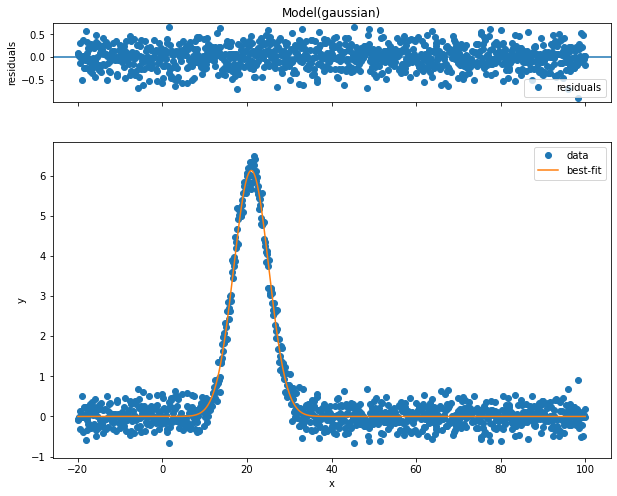

In [10]:
'''
Using user defined functions for constraints:

The underlying interpretation of function inputs in lm_fit is using the python asteval functionality. This library 
has the ability to interpret string inputs and convert them into python functions using a flat namespace that references 
both python and numpy. As has already been demonstrated it is possible to add dummy variables to the asteval namespace, 
it is also possible to add user defined functions for constraints. This can be done externally using asteval and the
lmf library by using the asteval_convert function, or done internally with lm_curve_fit by passing the function 
handle as a variable. The below is an example that uses a simple external function.

'''

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

def experimental_function(x_data):
    sigma=np.random.uniform(1,20)
    center=1+2.*max(sigma, 10)
    amp=3.*center+2./sigma
    p=[amp, center, sigma]
    sig=.25
    mu=0
    print('------------------------')
    print('The actual width is: %.3f'%sigma)
    print('------------------------')
    return gaussian(x_data, *p)+sig*np.random.randn(len(x_data))+mu

def user_func(a,b):
    return 2.*max(a,b)

#create our artificial experimental data
x_data=np.linspace(-20, 100, 1000)
y_data=experimental_function(x_data)

#define initial guesses
p0={'amp': None, 'cen': None, 'wid':5}

p_domain={'wid':[1,20]}

#define parameter expressions
p_expr={'amp': '3 * cen+ 2 / wid', 'cen': '1+rand_func(wid,10)', 'rand_func':user_func}

#fit data and show output
params, err=lm_curve_fit(gaussian, x_data, y_data, p0=p0, param_domain=p_domain, p_exprs=p_expr, plot_fit=True, verbose=True)



------------------------
The actual width is: 9.366
------------------------
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 1000
    # variables        = 2
    chi-square         = 63.7355547
    reduced chi-square = 0.06386328
    Akaike info crit   = -2749.01271
    Bayesian info crit = -2739.19720
[[Variables]]
    amp:     62.6657453 +/- 0.00209074 (0.00%) == '3.*cen+2./wid'
    cen:     20.8168855 +/- 0.09389484 (0.45%) == '1+rand_func(wid, a)'
    wid:     9.29847794 +/- 0.09038431 (0.97%) (init = 10)
    offset:  1 (fixed)
    a:       9.90844273 +/- 0.04694742 (0.47%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, a) =  0.309


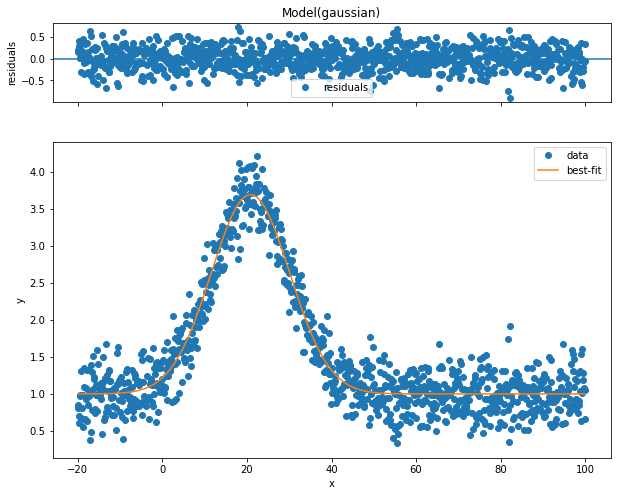

In [11]:
'''
Using user defined functions for constraints with list inputs:

As before user defined functions can also be input using a list input, but now the user defined function
handle is defined inside of the dict object that is set for the center position. Here we also provided 
a way of adding fit parameters into the user defined function. For example, lets say  the center is defined
by a function of the form:

mu=1+2.*max(sig, a)

Where a=10 in the experimental function. A situation that may be of interest is determining what a is
as a fit parameter. To do this we can simply write the expression as:

wid=1+2*rand_func(sig, a)

where we define the function rand_func and define 'a' with the following parameter values [value=10, min=0, max=20], 
now the variable 'a' will be added into the parameter space of the fit, so it will be provided in the fit statistics
of lm_fit! Effectively we have used constraint expression as a way to extend the fit parameter space while also 
better constraining our fit.
'''

def gaussian(x, amp, cen, wid, offset):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))+offset

def experimental_function(x_data):
    sigma=np.random.uniform(1,20)
    center=1+2.*max(sigma, 10)
    amp=3.*center+2./sigma
    p=[amp, center, sigma, 1]
    sig=.25
    mu=0
    print('------------------------')
    print('The actual width is: %.3f'%sigma)
    print('------------------------')
    return gaussian(x_data, *p)+sig*np.random.randn(len(x_data))+mu

def user_func(a,b):
    return 2.*max(a,b)

#create our artificial experimental data
x_data=np.linspace(-20, 100, 1000)
y_data=experimental_function(x_data)

#define initial guesses
p0=[None, None, 10, None]

#define relevant parameter domains
p_domain=[None, None, [1,20], None]

#define parameter overrides
p_over=[None, None, None, 1]

#define parameter expressions
p_expr=[{'fcn': '3.*cen+2./wid'}, {'fcn': '1+rand_func(wid, a)','a':[10,0,20], 'rand_func':user_func}, None, None]

#fit data and show output
params, err=lm_curve_fit(gaussian, x_data, y_data, p0=p0, p_over=p_over, param_domain=p_domain, p_exprs=p_expr, plot_fit=True, verbose=True)